# Handwritten Digit Recognition
- Author = Amitrajit Bose
- Dataset = MNIST
- [Medium Article Link](https://medium.com/@amitrajit_bose/handwritten-digit-mnist-pytorch-977b5338e627)
- Frameworks = PyTorch


### Necessary Imports

In [1]:
# Import necessary packages
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import numpy as np
import torch
import torchvision
import matplotlib.pyplot as plt
from time import time
import numpy as np
import pandas as pd
import copy
from dbclass import TrainDB
from torchvision import datasets, transforms

# Define a transform to normalize the data
transform = transforms.Compose([transforms.ToTensor(),
                              transforms.Normalize((0.5,), (0.5,)),
                              ])

# Download and load the training data
trainset = datasets.MNIST('drive/My Drive/mnist/MNIST_data/', download=True, train=True, transform=transform)
valset = datasets.MNIST('drive/My Drive/mnist/MNIST_data/', download=True, train=False, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)
valloader = torch.utils.data.DataLoader(valset, batch_size=64, shuffle=True)

### Defining The Neural Network

In [2]:
from torch import nn

# Layer details for the neural network
input_size = 784
hidden_sizes = [128, 64]
output_size = 10

# Build a feed-forward network
model = nn.Sequential(nn.Linear(input_size, hidden_sizes[0]),
                      nn.ReLU(),
                      nn.Linear(hidden_sizes[0], hidden_sizes[1]),
                      nn.ReLU(),
                      nn.Linear(hidden_sizes[1], output_size),
                      nn.LogSoftmax(dim=1))
criterion = nn.NLLLoss()

from torch import optim

# Optimizers require the parameters to optimize and a learning rate
optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.5)


In [3]:
db = TrainDB(model,trainloader,criterion)

### Core Training Of Neural Network

In [4]:
optimizer = optim.SGD(model.parameters(), lr=0.03, momentum=0.9)
time0 = time()
epochs = 2
for e in range(epochs):
    running_loss = 0
    for i, (images, labels) in enumerate(trainloader):
        prev_state = copy.deepcopy(model.state_dict())

        # Flatten MNIST images into a 784 long vector
        images = images.view(images.shape[0], -1)
    
        # Training pass
        optimizer.zero_grad()
        
        output = model(images)
        loss = criterion(output, labels)
        
        #This is where the model learns by backpropagating
        loss.backward(create_graph=True,retain_graph=True)
        #And optimizes its weights here
        optimizer.step()
        db.step(e,i,prev_state,model,loss.item())
        
        running_loss += loss.item()
    else:
        print("Epoch {} - Training loss: {}".format(e, running_loss/len(trainloader)))
       # print((model[0].weight))
print("\nTraining Time (in minutes) =",(time()-time0)/60)



Epoch 0 - Training loss: 0.36732132736045414
Epoch 1 - Training loss: 0.17115059407598682

Training Time (in minutes) = 0.4501376191775004


0.weight    [[0.018896148, 0.031183913, -0.016338954, 0.02...
0.bias      [0.0039854688, 0.032623403, 0.032542393, 0.026...
2.weight    [[0.04554765, 0.052088734, -0.07972545, -0.058...
2.bias      [0.06875351, 0.024805354, 0.0016184738, 0.0224...
4.weight    [[0.06264205, -0.35939676, 0.28669053, -0.1821...
4.bias      [-0.09921862, -0.09094728, -0.031144867, 0.069...
Name: 1, dtype: object

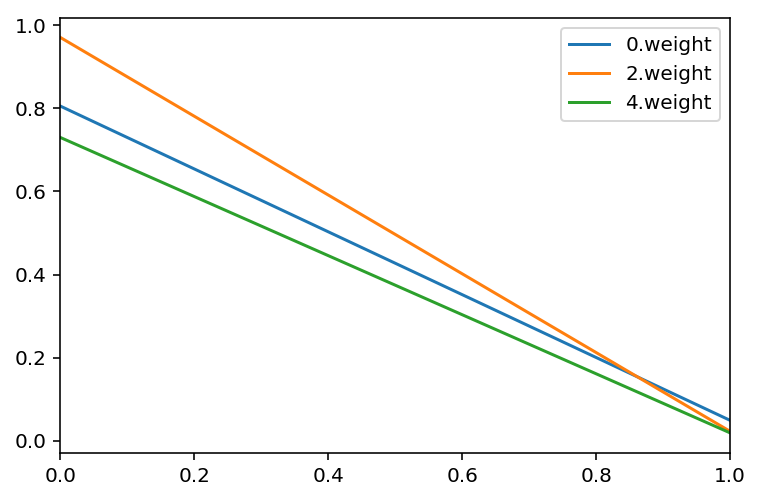

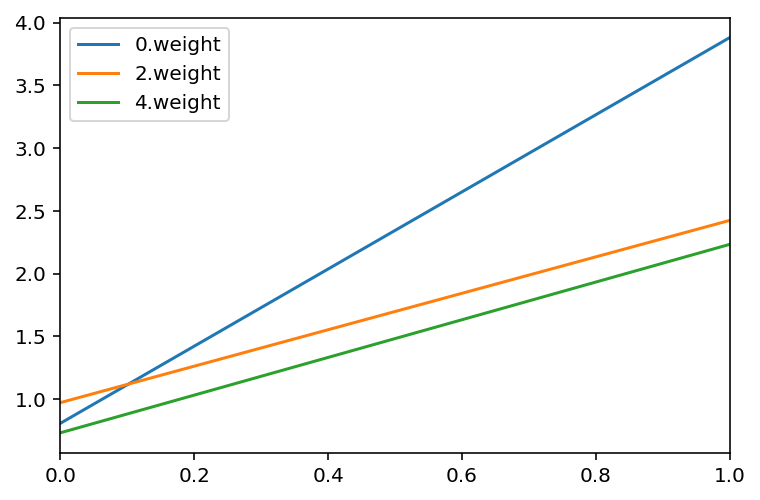

In [5]:
table1 = db.tweight
table3 = db.tdiffnorm
table2 = db.tnorm
table3[['0.weight', '2.weight', '4.weight']][:].plot()
table2[['0.weight', '2.weight', '4.weight']].plot()
table2.loc[1,'0.weight']
table1.loc[1]

In [ ]:
torch.from_numpy(table1.loc[(0,10),'0.weight'].values[0]).requires_grad

In [ ]:
print((table1.memory_usage(True,True).sum())/1000000)
print((table2.memory_usage(True,True).sum())/1000)
print((table3.memory_usage(True,True).sum())/1000)

### Model Evaluation

In [ ]:
correct_count, all_count = 0, 0
for images,labels in valloader:
  for i in range(len(labels)):
    img = images[i].view(1, 784)
    # Turn off gradients to speed up this part
    with torch.no_grad():
        logps = model(img)

    # Output of the network are log-probabilities, need to take exponential for probabilities
    ps = torch.exp(logps)
    probab = list(ps.numpy()[0])
    pred_label = probab.index(max(probab))
    true_label = labels.numpy()[i]
    if(true_label == pred_label):
      correct_count += 1
    all_count += 1

print("Number Of Images Tested =", all_count)
print("\nModel Accuracy =", (correct_count/all_count))

In [13]:
print(db.currnetwork.state_dict()['0.weight'])
print(db.reconstructnet(None,None).state_dict()['0.weight'])

tensor([[-0.0129, -0.0239, -0.0322,  ..., -0.0269, -0.0111, -0.0033],
        [ 0.0272, -0.0230, -0.0190,  ...,  0.0149, -0.0180,  0.0090],
        [-0.0246, -0.0244, -0.0252,  ...,  0.0162, -0.0066,  0.0043],
        ...,
        [ 0.0181, -0.0221, -0.0009,  ...,  0.0180,  0.0159,  0.0182],
        [-0.0102,  0.0333,  0.0082,  ...,  0.0317, -0.0104, -0.0002],
        [ 0.0218,  0.0396,  0.0416,  ...,  0.0016, -0.0141, -0.0006]])
tensor([[-0.0129, -0.0239, -0.0322,  ..., -0.0269, -0.0111, -0.0033],
        [ 0.0283, -0.0219, -0.0179,  ...,  0.0160, -0.0169,  0.0101],
        [-0.0246, -0.0244, -0.0252,  ...,  0.0162, -0.0066,  0.0043],
        ...,
        [ 0.0156, -0.0246, -0.0034,  ...,  0.0155,  0.0133,  0.0157],
        [-0.0074,  0.0361,  0.0110,  ...,  0.0345, -0.0076,  0.0026],
        [ 0.0187,  0.0364,  0.0384,  ..., -0.0015, -0.0172, -0.0038]])


In [6]:
#db.criterion = torch.nn.functional.nll_loss
db.ithhess_eigenval(k=4)

OrderedDict([('0.weight', tensor([[ 0.0164,  0.0287, -0.0189,  ..., -0.0003,  0.0221, -0.0148],
        [ 0.0338, -0.0150,  0.0310,  ...,  0.0048, -0.0331, -0.0200],
        [-0.0387,  0.0050, -0.0057,  ...,  0.0195,  0.0094, -0.0123],
        ...,
        [ 0.0431,  0.0058, -0.0039,  ...,  0.0409,  0.0084,  0.0151],
        [ 0.0061,  0.0266, -0.0274,  ...,  0.0010, -0.0083, -0.0012],
        [ 0.0002,  0.0067, -0.0128,  ...,  0.0201, -0.0024,  0.0040]])), ('0.bias', tensor([ 0.0065,  0.0326,  0.0324,  0.0247, -0.0132, -0.0028, -0.0323, -0.0345,
        -0.0103, -0.0300, -0.0421,  0.0110, -0.0262,  0.0224, -0.0067,  0.0253,
        -0.0393, -0.0342, -0.0274,  0.0032, -0.0230, -0.0307,  0.0320, -0.0356,
        -0.0343, -0.0067,  0.0021,  0.0047, -0.0071,  0.0307,  0.0074,  0.0093,
        -0.0091,  0.0054, -0.0074, -0.0439, -0.0263, -0.0050, -0.0211,  0.0055,
         0.0214, -0.0288, -0.0130, -0.0418, -0.0437,  0.0135,  0.0212,  0.0186,
         0.0159, -0.0246, -0.0106,  0.0240, -0.

[hessian_eigenthings] beginning deflated power iteration
[hessian_eigenthings] computing eigenvalue/vector 1 of 4
tensor([ 0.0035,  0.0035,  0.0035,  ..., -1.0151,  2.9629,  0.6144]) tensor([1., 1., 1.,  ..., 1., 1., 1.])
Step 0 - Time taken = 1 seconds
tensor([-0.0039, -0.0039, -0.0039,  ..., -0.0321,  0.0984,  0.0177]) tensor([ 3.2706e-05,  3.2706e-05,  3.2706e-05,  ..., -9.5760e-03,                                               1/20 
         2.7951e-02,  5.7962e-03])
Step 1 - Time taken = 1 seconds
tensor([-0.0038, -0.0038, -0.0038,  ..., -0.0375,  0.1101,  0.0170]) tensor([-0.0012, -0.0012, -0.0012,  ..., -0.0100,  0.0306,  0.0055])                                            2/20 
Step 2 - Time taken = 1 seconds
tensor([-0.0034, -0.0034, -0.0034,  ..., -0.0382,  0.1090,  0.0160]) tensor([-0.0011, -0.0011, -0.0011,  ..., -0.0102,  0.0301,  0.0047])                                            3/20 
Step 3 - Time taken = 1 seconds
tensor([-0.0031, -0.0031, -0.0031,  ..., -0.0385,  0.1

KeyboardInterrupt: 

In [7]:
from hessian_eigenthings2.hvp_operator import compute_hessian_eigenthings

network = copy.deepcopy(db.currnetwork)
eigvec,eigenvalues = compute_hessian_eigenthings(network,trainloader, criterion,num_eigenthings=4, use_gpu=False,power_iter_steps=20)

[hessian_eigenthings] beginning deflated power iteration
[hessian_eigenthings] computing eigenvalue/vector 1 of 4
tensor([ 0.0032,  0.0032,  0.0032,  ..., -1.0143,  2.9611,  0.6144]) tensor([1., 1., 1.,  ..., 1., 1., 1.])
Step 0 - Time taken = 13 seconds
tensor([-0.0039, -0.0039, -0.0039,  ..., -0.0321,  0.0983,  0.0177]) tensor([ 2.9939e-05,  2.9939e-05,  2.9939e-05,  ..., -9.5708e-03,                                               1/20 
         2.7942e-02,  5.7975e-03])
Step 1 - Time taken = 13 seconds
tensor([-0.0038, -0.0038, -0.0038,  ..., -0.0375,  0.1100,  0.0171]) tensor([-0.0012, -0.0012, -0.0012,  ..., -0.0100,  0.0305,  0.0055])                                            2/20 
Step 2 - Time taken = 12 seconds
tensor([-0.0034, -0.0034, -0.0034,  ..., -0.0383,  0.1088,  0.0160]) tensor([-0.0011, -0.0011, -0.0011,  ..., -0.0103,  0.0301,  0.0047])                                            3/20 
Step 3 - Time taken = 13 seconds
tensor([-0.0031, -0.0031, -0.0031,  ..., -0.0385, 

KeyboardInterrupt: 

In [ ]:
model.state_dict()

In [ ]:
db.currnetwork.state_dict()

In [ ]:
table1